### Mall Customer Segmentation Data

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [53]:
df = pd.read_csv('C:/Users/sshr0002/Desktop/Mall_customers.csv')

In [54]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [58]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [59]:
X = X.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Spending"})

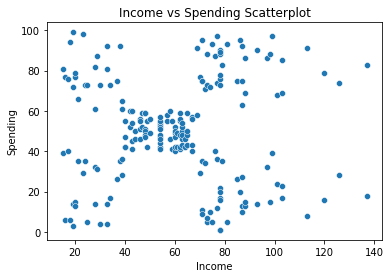

In [60]:
plt.title('Income vs Spending Scatterplot')
sns.scatterplot(x = 'Income', y = 'Spending', data = X)
plt.show()

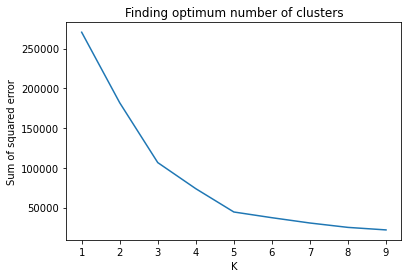

In [68]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Finding optimum number of clusters')
plt.plot(k_rng,sse)
plt.show()

In [62]:
Km = KMeans(n_clusters = 5, random_state = 0)
y_predicted = Km.fit_predict(X)
X['cluster'] = y_predicted

In [63]:
X.head()

,Income,Spending,cluster
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3


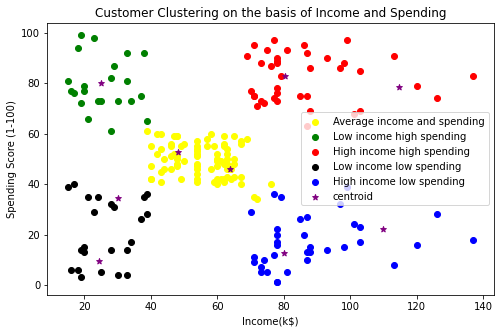

In [67]:
plt.figure(figsize=(8,5))
df1 = X[X.cluster==0]
df2 = X[X.cluster==1]
df3 = X[X.cluster==2]
df4 = X[X.cluster==3]
df5 = X[X.cluster==4]
plt.scatter(df1.Income,df1['Spending'],color='yellow',label='Average income and spending')
plt.scatter(df2.Income,df2['Spending'],color='green',label='Low income high spending')
plt.scatter(df3.Income,df3['Spending'],color='red',label='High income high spending')
plt.scatter(df4.Income,df4['Spending'],color='black',label='Low income low spending')
plt.scatter(df5.Income,df5['Spending'],color='blue',label='High income low spending')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') 
plt.title('Customer Clustering on the basis of Income and Spending')
plt.xlabel('Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### References

https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation
